In [27]:
import matplotlib.pyplot as plt
import numpy as np
import os

def moving_average(data, window_size=50):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

def load_rewards_from_txt(path: str):
    with open(path, 'r') as f:
        raw = f.read()
        rewards = eval(raw)  # ⚠️ Utilise seulement si le fichier est sûr
        return np.array(rewards)

def plot_rewards_from_file(path,  smooth_window=50):
    rewards = load_rewards_from_txt(os.path.join(path, "rewards.csv"))
    episodes = np.arange(len(rewards))

    output_path = os.path.join(path, "reward_plot.png")

    os.makedirs(os.path.dirname(output_path), exist_ok=True)

    plt.figure(figsize=(14, 6))
    plt.plot(episodes, rewards, alpha=0.3, label="Reward brut")

    if len(rewards) > smooth_window:
        smoothed = moving_average(rewards, smooth_window)
        plt.plot(episodes[smooth_window - 1:], smoothed, color="blue", label=f"Moyenne mobile (fenêtre={smooth_window})")

    plt.xlabel("Épisode")
    plt.ylabel("Reward")
    plt.title("Évolution du reward par épisode")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.savefig(os.path.join(path, "reward_plot.png"))
    print(f"✅ Graphe sauvegardé dans {output_path}")
    plt.show()


    

✅ Graphe sauvegardé dans ../../output/secret_env_0/exp_sarsa/reward_plot.png


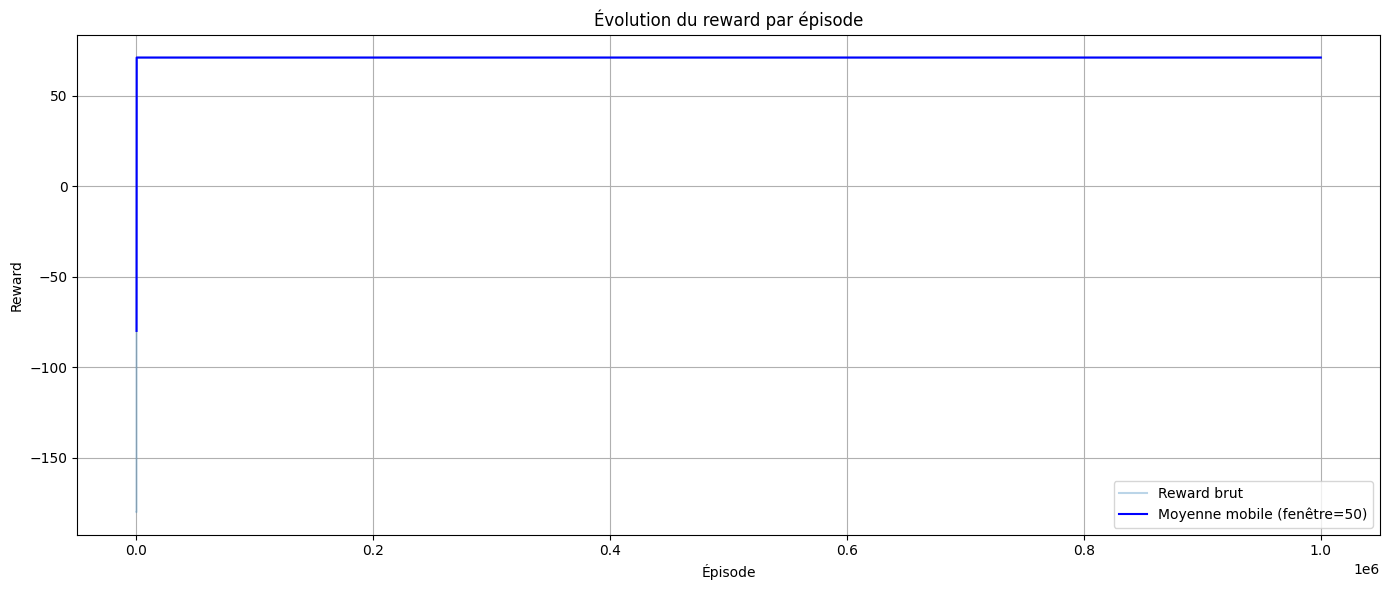

In [25]:
plot_rewards_from_file("../../output/secret_env_0/exp_sarsa/")